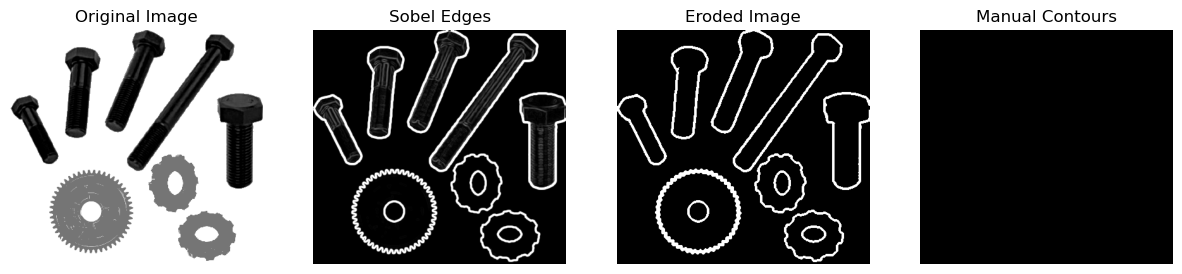

In [209]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

equalized_image = cv2.equalizeHist(image)

filtered_image = cv2.GaussianBlur(equalized_image, (3, 3), 0)


# Aplicando um filtro de bordas personalizado
# Usaremos um filtro Sobel para realçar bordas verticais e horizontais
sobelx = cv2.Sobel(filtered_image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(filtered_image, cv2.CV_64F, 0, 1, ksize=3)
# Calcula a magnetude do pixel
sobel_combined = cv2.magnitude(sobelx, sobely)
sobel_combined = cv2.convertScaleAbs(sobel_combined)
# Limiarização para converter em imagem binária
_, thresholded_image = cv2.threshold(sobel_combined, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Operações morfológicas para refinar bordas
kernel = np.ones((3,3), np.uint8)
dilated_image = cv2.dilate(thresholded_image, kernel, iterations=1)
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

# Extração de contorno
# s manual
# Criar uma matriz de zeros para desenhar os contornos
contour_image_manual = np.zeros_like(image)

# Percorrer a imagem e identificar contornos
for y in range(eroded_image.shape[0]):
    for x in range(eroded_image.shape[1]):
        if eroded_image[y, x] == 255:  # ponto branco, parte de um contorno
            cv2.circle(contour_image_manual, (x, y), 1, (0, 255, 0), -1)

# Visualizar resultados
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edges')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(contour_image_manual, cv2.COLOR_BGR2RGB))
plt.title('Manual Contours')
plt.axis('off')

plt.show()


In [5]:
def outline_extraction(image):
    
    equalized_image = cv2.equalizeHist(image)
    
    filtered_image = cv2.GaussianBlur(equalized_image, (3, 3), 0)
    
    # Specifying a value of dx=1 and dy=0 indicates that we want to compute the gradient across the x direction.
    # And supplying a value of dx=0 and dy=1 indicates that we want to compute the gradient across the y direction
    sobelx = cv2.Sobel(filtered_image, cv2.CV_64F, dx=1, dy=0, ksize=3)
    sobely = cv2.Sobel(filtered_image, cv2.CV_64F, dx=0, dy=1, ksize=3)
    sobel_combined = cv2.magnitude(sobelx, sobely)
    
    sobel_combined = cv2.convertScaleAbs(sobel_combined)
        
    _, binary_image = cv2.threshold(sobel_combined, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    thinned_image = cv2.ximgproc.thinning(binary_image)

    # Operações morfológicas para refinar bordas
    # o kernel define a vizinhança de pixels que será considerada
    kernel_1 = np.array([
        [0, 1, 0],
        [1, 0, 1],
        [0, 1, 0]
    ], dtype=np.uint8)
    kernel_2 = np.array([
        [1, 1, 1],
        [0, 0, 0],
        [1, 1, 1]
    ], dtype=np.uint8)
    
    # threshold_image = 255 - threshold_image
    # np.ones((3,3), np.uint8)
    
    # Fechamento0
    dilated_image_close = cv2.dilate(thinned_image, kernel_1, iterations=2)
    eroded_image_close = cv2.erode(dilated_image_close, np.ones((3,3), np.uint8), iterations=1)

    # Abertura
    eroded_image_open = cv2.erode(eroded_image_close, np.ones((2,1), np.uint8), iterations=1)
    dilated_image_open = cv2.dilate(eroded_image_open, np.ones((1,1), np.uint8), iterations=1)
    
    # _, final_image = cv2.threshold(eroded_image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # cv2.morphologyEx
    return eroded_image_close

# elemento estruturante: 1 ativo(branco) e 0 inativo (preto)
# dilatação : Se qualquer pixel na vizinhança do pixel de
# entrada estiver ativo, o pixel de saída fica ativo;
# caso contrário, o pixel fica inativo
# área de branco aumenta na imagem. (branco deve ser seu objeto)

# Erosão: Se todos os pixels na vizinhança do pixel de
# entrada estiver ativo, o pixel de saída fica ativo;
# caso contrário, o pixel fica inativo
# área de branco diminui na imagem. Aumenta preto

In [204]:
def outline_extraction(image):
    
    equalized_image = cv2.equalizeHist(image)
    
    filtered_image = cv2.GaussianBlur(equalized_image, (3, 3), 0)
    
    
    # Specifying a value of dx=1 and dy=0 indicates that we want to compute the gradient across the x direction.
    # And supplying a value of dx=0 and dy=1 indicates that we want to compute the gradient across the y direction
    sobelx = cv2.Sobel(filtered_image, cv2.CV_64F, dx=1, dy=0, ksize=3)
    sobely = cv2.Sobel(filtered_image, cv2.CV_64F, dx=0, dy=1, ksize=3)
    sobel_combined = cv2.magnitude(sobelx, sobely)
    
    sobel_combined = cv2.convertScaleAbs(sobel_combined)
        
    _, binary_image = cv2.threshold(sobel_combined, 100, 200, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    thinned_image = cv2.ximgproc.thinning(binary_image)

    # Operações morfológicas para refinar bordas
    # o kernel define a vizinhança de pixels que será considerada
    kernel_1 = np.array([
        [1, 1, 1],
        [0, 1, 0],
        [1, 1, 1]
    ], dtype=np.uint8)
    kernel_2 = np.array([
        [1, 1, 1],
        [0, 0, 0],
        [1, 1, 1]
    ], dtype=np.uint8)
    
    # threshold_image = 255 - threshold_image
    # np.ones((3,3), np.uint8)
    
    # Fechamento0
    # dilated_image_close = cv2.dilate(binary_image, np.ones((3,3), np.uint8) , iterations=1)
    eroded_image_close = cv2.erode(binary_image, np.ones((3,3), np.uint8), iterations=1)

    # Abertura
    # eroded_image_open = cv2.erode(eroded_image_close, np.ones((2,1), np.uint8), iterations=1)
    # dilated_image_open = cv2.dilate(eroded_image_open, np.ones((1,1), np.uint8), iterations=1)
    
    # _, final_image = cv2.threshold(eroded_image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # cv2.morphologyEx
    return eroded_image_close

# elemento estruturante: 1 ativo(branco) e 0 inativo (preto)
# dilatação : Se qualquer pixel na vizinhança do pixel de
# entrada estiver ativo, o pixel de saída fica ativo;
# caso contrário, o pixel fica inativo
# área de branco aumenta na imagem. (branco deve ser seu objeto)

# Erosão: Se todos os pixels na vizinhança do pixel de
# entrada estiver ativo, o pixel de saída fica ativo;
# caso contrário, o pixel fica inativo
# área de branco diminui na imagem. Aumenta preto

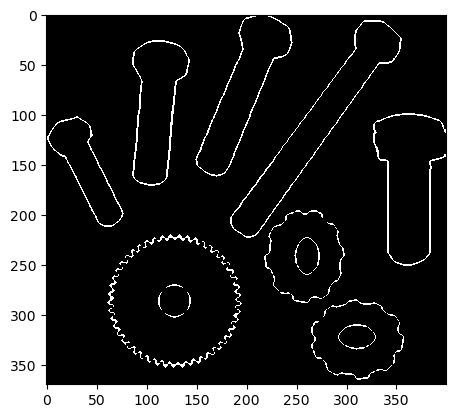

In [205]:
edge = outline_extraction(image)

# Visualizar resultados
# plt.figure(figsize=(15, 5))
# plt.subplot(1, 2, 1)
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.title('Original Image')
# plt.axis('off')

#plt.subplot(1, 2, 2)
plt.imshow(edge, cmap='gray')
#plt.title('Sobel Edges')
# plt.axis('off')


In [30]:
image = cv2.imread('cena.bmp', cv2.IMREAD_GRAYSCALE)


In [8]:
image.shape

(370, 400)

In [237]:
# Abertura: Erosão seguida de dilatação (remove ruídos) Aumenta preto
# Fechamento: Dilatação seguida de erosão (preenche buracos) Aumenta branco

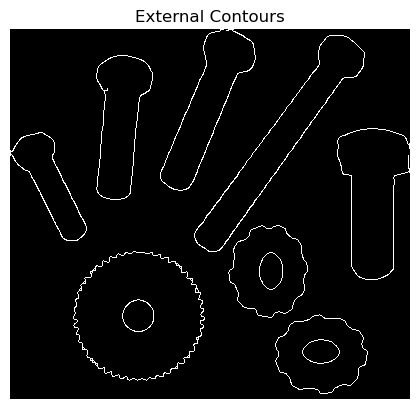

In [71]:
plt.imshow(im, cmap='gray')
plt.title("External Contours")
plt.axis('off')
plt.show()


In [210]:
for i in range(255, 0, -1):
    for j in range(255, 0, -1):
        print(i, j)
        plt.imshow(cv2.Canny(image, i, j), cmap='gray')
        

255 255
255 254
255 253
255 252
255 251
255 250
255 249
255 248
255 247
255 246
255 245
255 244
255 243
255 242
255 241
255 240
255 239
255 238
255 237
255 236
255 235
255 234
255 233
255 232
255 231
255 230
255 229
255 228
255 227
255 226
255 225
255 224
255 223
255 222
255 221
255 220
255 219
255 218
255 217
255 216
255 215
255 214
255 213
255 212
255 211
255 210
255 209
255 208
255 207
255 206
255 205
255 204
255 203
255 202
255 201
255 200
255 199
255 198
255 197
255 196
255 195
255 194
255 193
255 192
255 191
255 190
255 189
255 188
255 187
255 186
255 185
255 184
255 183
255 182
255 181
255 180
255 179
255 178
255 177
255 176
255 175
255 174
255 173
255 172
255 171
255 170
255 169
255 168
255 167
255 166
255 165
255 164
255 163
255 162
255 161
255 160
255 159
255 158
255 157
255 156
255 155
255 154
255 153
255 152
255 151
255 150
255 149
255 148
255 147
255 146
255 145
255 144
255 143
255 142
255 141
255 140
255 139
255 138
255 137
255 136
255 135
255 134
255 133
255 132
255 131


KeyboardInterrupt: 

In [ ]:
# Máscaras do Laplaciano:
# Centro negativo: remove bordas exteriores
# Centro positivo: remove bordas interiores